In [212]:
import numpy as np
import gym
from gym import spaces
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import random

os.chdir('/Users/jmccarty/GitHub/image_registration_RL/')

### Inspect a Map

In [16]:
path_sample_image = './data/tif_files/LKg_1092_1990.tif'
path_sample_template_1 = './data/templates/temp_1.tif'
path_sample_template_2 = './data/templates/temp_2.tif'

In [204]:
# reminder that cv2 origin is top left the flip moves it to the bottom left

image_color = cv2.imread(path_sample_image)
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

template_color = cv2.imread(path_sample_template_1)
template = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)


I_HEIGHT, I_WIDTH = image.shape
T_HEIGHT, T_WIDTH = template.shape

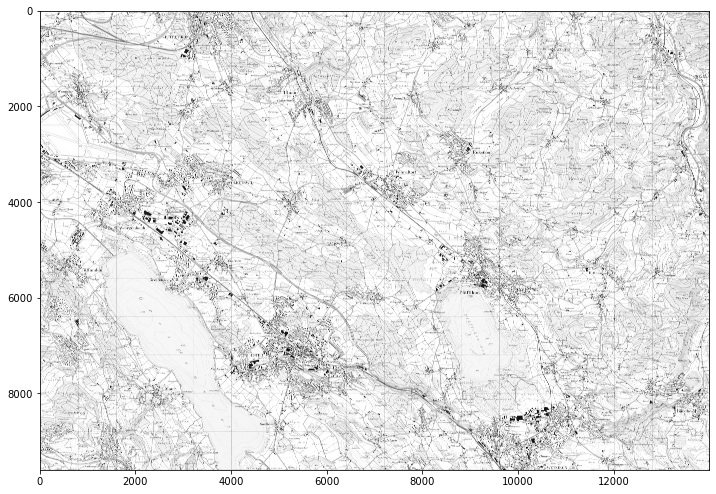

In [252]:
fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(image,cmap='Greys_r')

In [260]:
x,y = 0,0
print(y,y+T_HEIGHT)
print(x,x+T_WIDTH)
print("----------")
print(y+T_HEIGHT,y+T_HEIGHT+T_HEIGHT)
print(x-T_WIDTH,x-T_WIDTH+T_WIDTH)
print("----------")
print(y,y+T_HEIGHT)
print(x-T_WIDTH,x-T_WIDTH+T_WIDTH)
print("----------")
print(y-T_HEIGHT,y-T_HEIGHT+T_HEIGHT)
print(x-T_WIDTH,x-T_WIDTH+T_WIDTH)
print("----------")
print(y-T_HEIGHT,y-T_HEIGHT+T_HEIGHT)
print(x,x+T_WIDTH)
print("----------")
print(y-T_HEIGHT,y-T_HEIGHT+T_HEIGHT)
print(x+T_WIDTH,x+T_WIDTH+T_WIDTH)
print("----------")
print(y,y+T_HEIGHT)
print(x+T_WIDTH,x+T_WIDTH+T_WIDTH)
print("----------")
print(y+T_HEIGHT,y+T_HEIGHT+T_HEIGHT)
print(x+T_WIDTH,x+T_WIDTH+T_WIDTH)
print("----------")
print(y+T_HEIGHT,y+T_HEIGHT+T_HEIGHT)
print(x,x+T_WIDTH)

0 18
0 45
----------
18 36
-45 0
----------
0 18
-45 0
----------
-18 0
-45 0
----------
-18 0
0 45
----------
-18 0
45 90
----------
0 18
45 90
----------
18 36
45 90
----------
18 36
0 45


In [334]:
x,y = int(0),int(0)

def calc_surround_origins(x,y,T_WIDTH,T_HEIGHT):
    origins = [(x,y),
            (x-T_WIDTH,y+T_HEIGHT),
            (x-T_WIDTH,y),
            (x-T_WIDTH,y-T_HEIGHT),
            (x,y-T_HEIGHT),
            (x+T_WIDTH,y-T_HEIGHT),
            (x+T_WIDTH,y),
            (x+T_WIDTH,y+T_HEIGHT),
            (x,y+T_HEIGHT)]
    return origins

def calc_surround_arrs(image,x,y,T_WIDTH,T_HEIGHT):
    all_surround = [image[y:y+T_HEIGHT,
                        x:x+T_WIDTH],
                    image[y+T_HEIGHT:y+T_HEIGHT+T_HEIGHT,
                        x-T_WIDTH:x-T_WIDTH+T_WIDTH],
                    image[y:y+T_HEIGHT,
                        x-T_WIDTH:x-T_WIDTH+T_WIDTH],
                    image[y-T_HEIGHT:y-T_HEIGHT+T_HEIGHT,
                        x-T_WIDTH:x-T_WIDTH+T_WIDTH],
                    image[y-T_HEIGHT:y-T_HEIGHT+T_HEIGHT,
                        x:x+T_WIDTH],
                    image[y-T_HEIGHT:y-T_HEIGHT+T_HEIGHT,
                        x+T_WIDTH:x+T_WIDTH+T_WIDTH],
                    image[y:y+T_HEIGHT,
                        x+T_WIDTH:x+T_WIDTH+T_WIDTH],
                    image[y+T_HEIGHT:y+T_HEIGHT+T_HEIGHT,
                        x+T_WIDTH:x+T_WIDTH+T_WIDTH],
                    image[y+T_HEIGHT:y+T_HEIGHT+T_HEIGHT,
                        x:x+T_WIDTH]]
    return all_surround
    

def find_regions_interest(image,x,y,T_WIDTH,T_HEIGHT):
    mask = []
    for n,t in enumerate(calc_surround_origins(x,y,T_WIDTH,T_HEIGHT)):
        if t[0] < 0 or t[1] < 0:
            pass
        else:
            mask.append(n)
    all_surround = calc_surround_arrs(image,x,y,T_WIDTH,T_HEIGHT)
    
    return [all_surround[i] for i in mask]


find_regions_interest(image,x,y,T_WIDTH,T_HEIGHT)

[array([[ 10,   1,   1,  17,   8,   3,   1,   2,   0,   0,  21,  47,   0,
           0,  23,  32,   1,   0,   5,  39,   0,  65, 138, 106,  29,  49,
          45,  15,  18, 185, 255, 237, 244, 239, 233, 232, 217, 213, 228,
         246, 244, 243, 243, 243, 245],
        [  3,   0,  28, 153, 150, 158, 140, 122, 126, 145, 162, 158, 112,
         160, 131,  56, 105, 158, 161, 125, 106, 186, 233, 218, 167, 170,
         150, 121, 153, 233, 255, 251, 254, 252, 249, 250, 246, 246, 248,
         252, 254, 252, 252, 251, 253],
        [  0,   0,  68, 255, 255, 255, 255, 249, 254, 255, 255, 253, 252,
         255, 248, 170, 244, 255, 255, 241, 248, 255, 255, 255, 255, 255,
         253, 247, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255],
        [  0,   0,  87, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 251, 255,
         255, 255, 255, 255, 255, 255, 244, 253, 255, 248, 247, 24

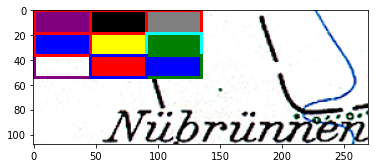

In [264]:
colos = []
fig, ax = plt.subplots()

ax.imshow(image_color[y:y+T_HEIGHT*6, x:x+T_WIDTH*6])
# ax.imshow(cv2.rectangle(, (0,255,0), 1))
# plt.imshow(cv2.rectangle(image_color[y:y+T_HEIGHT*6, x:x+T_WIDTH*6], (x,y), (x+T_WIDTH, y+T_HEIGHT), (0,125,255), 1))
# plt.imshow(cv2.rectangle(image_color[y:y+T_HEIGHT*6, x:x+T_WIDTH*6], )

x,y = 45,18
# Create a Rectangle patch
ax.add_patch(patches.Rectangle((x,y), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='y', 
                         facecolor='yellow'))

ax.add_patch(patches.Rectangle((x-T_WIDTH,y+T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='purple', 
                         facecolor='none'))

ax.add_patch(patches.Rectangle((x-T_WIDTH,y), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='r', 
                         facecolor='blue'))

ax.add_patch(patches.Rectangle((x-T_WIDTH,y-T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='r', 
                         facecolor='purple'))

ax.add_patch(patches.Rectangle((x,y-T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='r', 
                         facecolor='black'))

ax.add_patch(patches.Rectangle((x+T_WIDTH,y-T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='r', 
                         facecolor='grey'))

ax.add_patch(patches.Rectangle((x+T_WIDTH,y), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='cyan', 
                         facecolor='green'))

ax.add_patch(patches.Rectangle((x+T_WIDTH,y+T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='g', 
                         facecolor='blue'))

ax.add_patch(patches.Rectangle((x,y+T_HEIGHT), #origin
                         T_WIDTH, #x-dimension
                         T_HEIGHT, #y-dimension
                         linewidth=3, 
                         edgecolor='b', 
                         facecolor='red'))

In [ ]:
template = cv2.imread(path_temp,0)

height, width = template.shape
loc, res = template_matching(image,template,default_threshold, method)

for (x,y) in zip(loc[0], loc[1]):
    cv2.rectangle(image_color, (x,y), (x+width, y+height), (0,0,255), 2)

### Building Environment

Built off the boilerplate in: 

https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e 


In [335]:


class TemplateMatchingEnv(gym.Env):
  """A tempalte matching environment for OpenAI gym"""
  metadata = {'render.modes': ['human']}
  def __init__(self, image_array, template_array):
    super(TemplateMatchingEnv, self).__init__()
    self.image_array = image_array
    self.template_array = template_array
    self.I_HEIGHT, self.I_WIDTH = image_array.shape
    self.T_HEIGHT, self.T_WIDTH = template_array.shape
    self.reward_range = (0, int(np.ceil((self.I_HEIGHT/self.T_HEIGHT)*2 + (self.I_WIDTH/self.T_WIDTH)*2)))
    
    # Example when using discrete actions:
    self.action_space = spaces.Discrete(8)
    
    
    # Example for using image as input:
    self.observation_space = spaces.Box(low=0, high=255, shape=
                    (self.I_HEIGHT, self.I_WIDTH, 1), dtype=np.uint8)
  
  def reset(self):
    # Reset the state of the environment to an initial state
    # self.balance = INITIAL_ACCOUNT_BALANCE
    # self.net_worth = INITIAL_ACCOUNT_BALANCE
    # self.max_net_worth = INITIAL_ACCOUNT_BALANCE
    # self.shares_held = 0
    # self.cost_basis = 0
    # self.total_shares_sold = 0
    # self.total_sales_value = 0
  
    # Set the current step to a random point within the data frame
    self.current_step = (random.randint(0, self.I_HEIGHT-self.T_HEIGHT),
                         random.randint(0, self.I_WIDTH-self.T_WIDTH)) # (y,x)
    return self._next_observation()
  
  def _next_observation(self):
    # Get the surrounding boxes
    # need to control for the edge conditions:
    rois = find_regions_interest(self.image_array,
                                 self.current_step[1],
                                 self.current_step[0],
                                 self.T_WIDTH,
                                 self.T_HEIGHT)
    return rois
  
  def step(self, action):
    # Execute one time step within the environment
    self._take_action(action)
    self.current_step += 1
    if self.current_step > len(self.df.loc[:, 'Open'].values) - 6:
      self.current_step = 0
    delay_modifier = (self.current_step / MAX_STEPS)
    
    reward = self.balance * delay_modifier
    done = self.net_worth <= 0
    obs = self._next_observation()
    print(obs)
    return obs, reward, done, {}

  def _take_action(self, action):
    # Set the current price to a random price within the time step
    current_price = random.uniform(
      self.df.loc[self.current_step, "Open"],
      self.df.loc[self.current_step, "Close"])
    action_type = action[0]
    amount = action[1]
    if action_type < 1:
      # Buy amount % of balance in shares
      total_possible = self.balance / current_price
      shares_bought = total_possible * amount
      prev_cost = self.cost_basis * self.shares_held
      additional_cost = shares_bought * current_price
      self.balance -= additional_cost
      self.cost_basis = (prev_cost + additional_cost) / 
                              (self.shares_held + shares_bought)
      self.shares_held += shares_bought
    elif actionType < 2:
      # Sell amount % of shares held
      shares_sold = self.shares_held * amount . 
      self.balance += shares_sold * current_price
      self.shares_held -= shares_sold
      self.total_shares_sold += shares_sold
      self.total_sales_value += shares_sold * current_price
    self.netWorth = self.balance + self.shares_held * current_price
    if self.net_worth > self.max_net_worth:
      self.max_net_worth = net_worth
    if self.shares_held == 0:
      self.cost_basis = 0

In [338]:
## SCript to run the RL

# global variables
SIMILARTY_THRESHOLD = 0
MAX_STEPS = 100
TOTAL_EPISODES = 2000

# load data
image =
template =


# The algorithms require a vectorized environment to run
env = TemplateMatchingEnv(image, template)
model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=20000)


# iterate the RL 
obs = env.reset()
for episode in np.arange(0,TOTAL_EPISODES): 
  action, _states = # do some to illict an action 
  obs, rewards, done, info = env.step(action) # take a step based on the new action
  env.render()

NameError: name 'pd' is not defined